# Data Preprocessing and EDA 2

# AffectNet 

More images were obtained from [Source](https://www.kaggle.com/datasets/noamsegal/affectnet-training-data). These images are a subset from the large dataset, [AffectNet](http://mohammadmahoor.com/affectnet/), where facial images were collected from the Internet by using emotion related keywords in six different languages on major search engines.

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
import tensorflow as tf
import shutil
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# Importing global variables
sys.path.append('./Main/Helper/')
import helper as hp

Metal device set to: Apple M2 Max


# Finding image width and height

The dimensions of the images in the AffectNet dataset are: 96 x 96 and are in color (RGB).

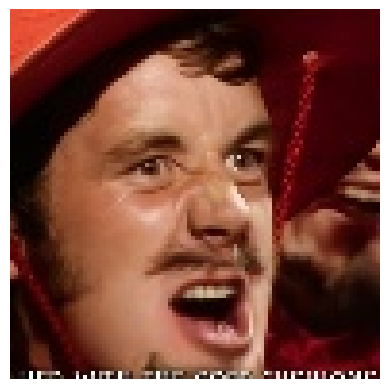

(96, 96, 3)


In [3]:
#Load sample image from AffectNet
image = Image.open('./Data/AffectNet/anger/image0000061.jpg')

# Display image
plt.imshow(image)
plt.axis('off') # Turn axes off
plt.show();

#Get the shape of sample image
image_shape = img_to_array(image).shape
#Print shape of sample image
print(image_shape)

### Convert all images in `AffectNet` dataset to .jpg

In [8]:
base_dir = './Data/AffectNet'  # Path to the base directory

# Iterate through the base directory and its subdirectories
for root, dirs, files in os.walk(base_dir):
    # Exclude hidden directories
    dirs[:] = [d for d in dirs if not d.startswith('.')]
    
    for filename in files:
        # Exclude hidden files
        if not filename.startswith('.'):
            # Check if the file has an image extension
            image_extensions = ['.jpg', '.jpeg', '.png']
            if any(filename.lower().endswith(ext) for ext in image_extensions):
                # Rename the file to have the desired extension
                new_filename = os.path.splitext(filename)[0] + '.jpg'
                old_path = os.path.join(root, filename)
                new_path = os.path.join(root, new_filename)
                os.rename(old_path, new_path)

In [9]:
dataset_dir = './Data/AffectNet'  # Directory of your dataset

# Iterate through the dataset directory
with os.scandir(dataset_dir) as entries:
    for entry in entries:
        if entry.name == '.DS_Store':
            continue  # Skip the .DS_Store file
        if entry.is_file():
            print(entry.name)

In [10]:
dataset_dir = './Data/AffectNet'  # Directory of your dataset

# Iterate through the dataset directory
with os.scandir(dataset_dir) as entries:
    for entry in entries:
        if entry.name.startswith('.'):
            print(entry.name)

.DS_Store


In [11]:
AffectNet = image_dataset_from_directory(
    './Data/AffectNet',
    image_size=(96, 96),
    seed=42,
    color_mode='grayscale',
    label_mode='categorical'
)

Found 29042 files belonging to 8 classes.


In [12]:
AffectNet.class_names

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [13]:
hp.print_class_counts(AffectNet)

2023-06-01 23:50:40.546473: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Index 0: anger - Count: 3218, Percentage: 11.08%
Index 1: contempt - Count: 2871, Percentage: 9.89%
Index 2: disgust - Count: 2477, Percentage: 8.53%
Index 3: fear - Count: 3176, Percentage: 10.94%
Index 4: happy - Count: 5044, Percentage: 17.37%
Index 5: neutral - Count: 5126, Percentage: 17.65%
Index 6: sad - Count: 3091, Percentage: 10.64%
Index 7: surprise - Count: 4039, Percentage: 13.91%


# Preprocess and augment the images

In order for the AffectNet images to match the images in the FER2013 dataset, they will need to be preprocessed into 48 x 48 resolution and converted into grayscale. 

In [14]:
# Preprocess and filter specific amount of images to new directory

source_dir = './Data/AffectNet'
destination_dir = './Data/P_AffectNet'
num_images_to_keep = {
    'fear': 3118,
    'neutral': 2250,
    'sad': 2385
}

hp.preprocess_and_filter_images(source_dir, destination_dir, num_images_to_keep)

### Check to make sure images were correctly preprocessed

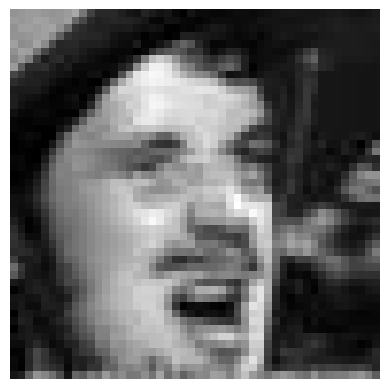

(48, 48, 1)


In [15]:
#Load sample image from AffectNet
image = Image.open('./Data/P_AffectNet/anger/image0000061.jpg')

# Display image
plt.imshow(image, cmap= 'gray') # set cmap as gray since matplotlib uses 'viridis' by default
plt.axis('off') # Turn axes off
plt.show();

#Get the shape of sample image
image_shape = img_to_array(image).shape
#Print shape of sample image
print(image_shape)

The images in the AffectNet dataset are now 48 x 48 and are in grayscale like the images in FER 2013.

These preprocessed images (except contempt) from `P_AffectNet` were combined with the train dataset in FER2013 to combat imbalanced classes. This combination of datasets were labeled as `Combined_Data`.

Since the goal was to obtain around 7,215 images in each class the amount of images that will be combined from the `P_AffectNet`and used in the `Final_Data` are as follows:

* Anger: entire dataset (3218 images)
* Contempt: NONE since this is not a class in FER2013 dataset
* Disgust: entire dataset (2524 images)
* Fear: 3118 images 
* Happy: NONE since we do not require more data on this class
* Neutral: 2250 images
* Sad: 2385 images
* Surprise: entire dataset (4039 images)

### Copy test and train dataset from FER-2013 to Combined_Data

In [16]:
# Define the source folder
source_folder = './Data/FER2013/test'

# Define the destination folder
destination_folder = './Data/Combined_Data/test'

# Copy the entire test folder to the destination folder
shutil.copytree(source_folder, destination_folder)

'./Data/Combined_Data/test'

In [17]:
# Define the source folder
source_folder = './Data/FER2013/train'

# Define the destination folder
destination_folder = './Data/Combined_Data/train'

# Copy the entire test folder to the destination folder
shutil.copytree(source_folder, destination_folder)

'./Data/Combined_Data/train'

### Copy images in AffectNet into Combined_Data

In [18]:
# Define the source folder
source_folder = './Data/P_AffectNet/anger'

# Define the destination folder
destination_folder = './Data/Combined_Data/train/angry'   #FER2013 labels this class as 'angry'

# Create the destination parent folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy the images from the source folder to the destination folder
filenames = os.listdir(source_folder)
for filename in filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    if os.path.isfile(source_path):  # Check if the item is a file
        shutil.copyfile(source_path, destination_path)

In [39]:
# Define the source folders
source_folders = [
                  './Data/P_AffectNet/disgust',
                  './Data/P_AffectNet/fear',
                  './Data/P_AffectNet/neutral',
                  './Data/P_AffectNet/sad',
                 './Data/P_AffectNet/surprise']

# Define the destination parent folder
destination_parent_folder = './Data/Combined_Data/train'

# Copy all the images from source folders to separate destination folders
for folder in source_folders:
    class_name = os.path.basename(folder)  # Extract the class name from the folder path
    destination_folder = os.path.join(destination_parent_folder, class_name)

    # Create the destination class folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    filenames = os.listdir(folder)
    for filename in filenames:
        source_path = os.path.join(folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        
        if os.path.isfile(source_path):  # Check if the item is a file
            shutil.copyfile(source_path, destination_path)

In [24]:
Combined_Data_train = image_dataset_from_directory(
    './Data/Combined_Data/train',
    image_size=(48,48),
    seed=42,
    color_mode='grayscale',
    label_mode='categorical'
)


Combined_Data_test = image_dataset_from_directory(
    './Data/Combined_Data/test',
    image_size=(48,48),
    seed=42,
    color_mode='grayscale',
    label_mode='categorical'
)

Found 46196 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [25]:
Combined_Data_train.class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [26]:
hp.print_class_counts(Combined_Data_train)

Index 0: angry - Count: 7213, Percentage: 15.61%
Index 1: disgust - Count: 2913, Percentage: 6.31%
Index 2: fear - Count: 7215, Percentage: 15.62%
Index 3: happy - Count: 7215, Percentage: 15.62%
Index 4: neutral - Count: 7215, Percentage: 15.62%
Index 5: sad - Count: 7215, Percentage: 15.62%
Index 6: surprise - Count: 7210, Percentage: 15.61%
